A contour is a finite collection of paths joined end to end. A path can be represented as a continuous function form an closed iterval to $\mathbb{C}$ as follows 
$$ \gamma: [a~ b]\subset \mathbb{R} \to \mathbb{C}; \quad \gamma = \gamma(t)$$ 
Then the integration of any complex function along this path is is given by 
$$\int_\gamma f(z)dz = \int_a^b f(t)~\gamma'(t)~dt = \sum_{i=1}^n f(t_i) \left[\gamma(t_i)-\gamma(t_{i-1})\right] $$

**Question:** Find the integration of $f(z)=z^2$ along the parabolic path from $0$ to $1$.

**Answer:** In order to find the integration we have to find to parametrize the curve as $\gamma(t)=t+t^2i$, $t\in [0,1]$.

In [101]:
%matplotlib inline 
import numpy as np
from matplotlib import pyplot as plt
from sympy import symbols, integrate, diff, init_printing, lambdify, N
from utility import argand
init_printing()

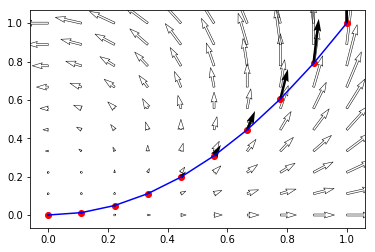

In [102]:
x,y,t = symbols("x y t")
def γ(t):
    return t + t**2 * 1j

def f(z):
    return z*z

# arr = np.linspace(0, 1, 10)
# cnums = [γ(t) for t in arr]
# imgs = [f(z) for z in cnums]

arr = np.linspace(0, 1, 10)
# Y = np.linspace(0, 1, 10)
X, Y = np.meshgrid(arr, arr)

U = X**2 - Y**2
V = 2*X*Y


plt.quiver(X, Y, U, V,edgecolor='k', facecolor='None', linewidth=.5)

cnums = np.array(list(map(γ, arr  )))
imgs  = np.array(list(map(f, cnums)))
X_0 = list(map(lambda z: z.real, cnums))
Y_0 = list(map(lambda z: z.imag, cnums))
U_0 = list(map(lambda z: z.real, imgs))
V_0 = list(map(lambda z: z.imag, imgs))

plt.plot(X_0, Y_0, color='blue')
plt.scatter(X_0, Y_0, color='red')
plt.quiver(X_0,Y_0,U_0,V_0)

plt.show()
# [(f(x+1j*y).real, f(x+1j*y).imag) for x in X for y in Y ]

## Numerical Computation

We can subdivide the curve into equal parts and then compute the sum as given in the definition. For 100 subdivisions we have the following result 

In [103]:
def num_int(n):
    arr = np.linspace(0, 1, 10*n)
    cnums = np.array(list(map(γ, arr  )))
    imgs  = np.array(list(map(f, cnums)))

    Δt = cnums[1:]-cnums[:-1]
    out = np.dot(imgs[1:],Δt)
    return out

N(num_int(10))

We can improve the accuracy by increasing the number of subdivisions, For example the same integration for 1000 subdivisions will be

In [104]:
N(num_int(100))

We can plot the result for a number of points to see the convergence in complex plane as follows

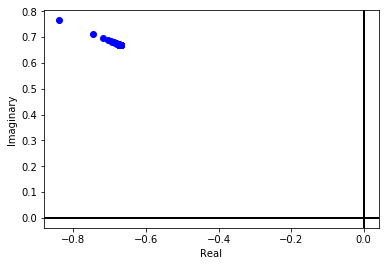

In [105]:
[argand(num_int(x)) for x in range(1,100)]
plt.show()

## Parametrization
Now we do the same computation using the parametrization of the curve, hence the value turns out to be exactly equalt to

In [106]:
integrate(f(γ(t))*diff(γ(t), t),(t,0,1))